## K-means
http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])
print(points)

[[  1.73624918e+00   5.55092006e-01]
 [  7.16691123e-01  -1.00544563e-01]
 [  1.15849461e+00  -6.93576007e-01]
 [  2.09321157e-01  -5.55212695e-01]
 [  1.69963627e+00   5.85894142e-01]
 [  1.84283512e+00   8.17983583e-01]
 [  2.22531215e+00  -1.08840514e+00]
 [  1.66546436e+00   5.34170042e-02]
 [  3.25036042e-01  -1.97852840e-01]
 [  2.24993211e+00  -2.78678692e-01]
 [  1.90855436e+00  -4.46755706e-01]
 [  1.30551731e+00   1.30987043e+00]
 [  1.15276449e+00  -7.08194423e-01]
 [  1.29789012e+00  -4.49184182e-01]
 [  1.46265064e+00  -3.99003694e-01]
 [  4.37343062e-01  -7.64217299e-02]
 [  9.70934435e-01  -4.98122780e-01]
 [  1.95114822e+00   7.31938597e-01]
 [  1.77978369e+00   4.02491214e-01]
 [  4.79734447e-01  -3.69768230e-01]
 [  1.36431845e+00  -1.46642780e+00]
 [  1.05506528e+00   8.76379886e-01]
 [  9.38907421e-01   2.69790193e-01]
 [  5.70140243e-01  -1.36083560e+00]
 [  1.14419496e+00  -8.26509109e-01]
 [  1.51793390e+00   6.38253585e-01]
 [  1.48312059e+00   2.62066349e-01]
 

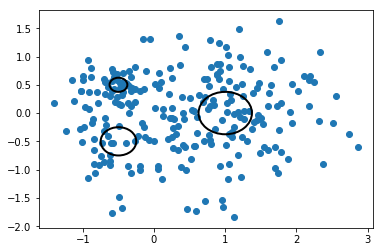

In [6]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax = plt.gca() # The function gca() returns the current axes.
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [5]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [15]:
# Try it out
initialize_centroids(points, 3)

array([[-1.01520484, -0.50980525],
       [-0.93304603,  0.93770103],
       [ 1.88221219, -0.80997349]])

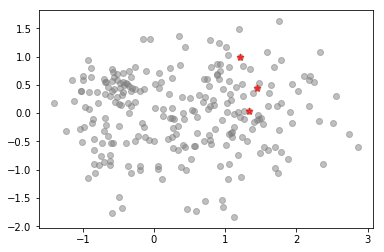

In [16]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [6]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [8]:
# broadcast
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(3, 1, 2)
(3, 250, 2)
[[[ 1.55387124 -1.1441598 ]
  [ 0.5119553   0.40093131]
  [ 2.80789698 -0.19044873]
  ..., 
  [ 0.49295461 -1.44297987]
  [ 0.71742945 -1.71111266]
  [ 0.41653693 -1.09518331]]

 [[-0.16056499  0.45881158]
  [-1.20248094  2.00390269]
  [ 1.09346075  1.41252265]
  ..., 
  [-1.22148162  0.15999151]
  [-0.99700678 -0.10814128]
  [-1.2978993   0.50778807]]

 [[-0.34207169 -0.91068752]
  [-1.38398763  0.63440359]
  [ 0.91195405  0.04302355]
  ..., 
  [-1.40298832 -1.20950758]
  [-1.17851348 -1.47764038]
  [-1.479406   -0.86171103]]]


In [9]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[-0.63775243  0.53883304]
 [ 0.76956812 -0.81349916]
 [ 0.66747695 -0.16993392]]
[1 0 2 2 1 2 1 1 2 2 2 2 2 1 0 1 1 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 0 2 0 1 1
 2 2 1 2 2 2 1 1 2 2 2 0 1 0 2 1 0 2 2 2 0 0 2 2 2 1 2 1 2 0 2 2 1 1 2 2 1
 2 1 2 1 2 0 0 2 2 2 0 2 0 1 2 2 0 1 2 1 0 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 0 2 1 2 0 0 0 1 2 1 2 0 1 1 2 0 2 1 1 2 2 1 1 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1 0 1 0 0 0 1 0 0
 0 1 1 2 1 0 0 0 0 1 2 0 0 0 0 2 1 0 2 0 0 0 0 1 1 1 1 0]


In [7]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [20]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[ 1.70437851  0.4817614 ]
 [ 0.45075077 -0.4265424 ]
 [-0.03454075  0.68072311]]


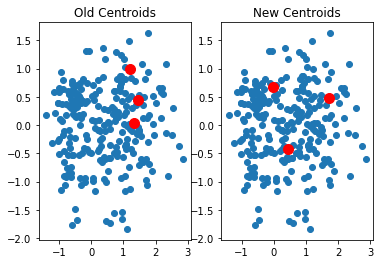

In [22]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

### Iteration

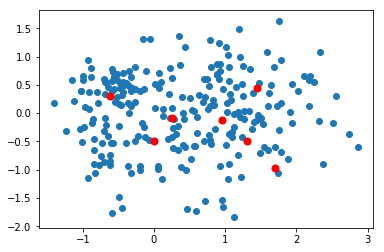

In [23]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

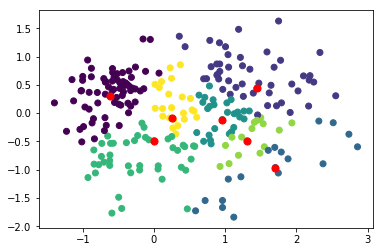

In [24]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

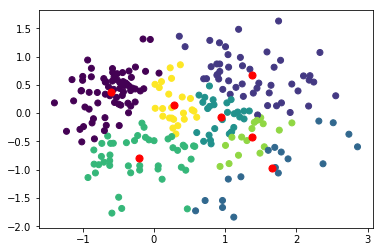

In [25]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

### Animation

In [3]:
import ipywidgets

In [33]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[-0.26778709  0.54372456]
 [-0.32636436  0.66788857]
 [-0.38026671  0.03975903]
 [ 0.68921738 -0.17336427]
 [ 0.54294458  0.8635758 ]
 [-0.70340028 -0.03100307]
 [-0.01096453  0.37496003]]


In [34]:
# iter
def f(x):
    global points, centroids, closest
    
    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 3 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 3 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    else: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")

In [35]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

<function __main__.f>